# Chronic Kidney Disease: To Be or Not to Be? 

### Introduction

Over 780 million people worldwide are affected by Chronic Kidney Disease (CKD)<sup>1</sup>. We want to create a prediction model trained on a dataset, containing attributes of a person’s biological information and health based on medical tests **to determine if a new patient is likely to have, or, in the future, develop CKD.** 

We're using the Chronic_Kidney_Disease dataset from UCI's Machine Learning Repository, which is sourced from Apollo Hospitals, India. Its variables contain both numeric and nominal values. 

The health factors being considered in the dataset are:

age	-	age	<br />
bp	-	blood pressure <br />
sg	-	specific gravity <br />
al	- albumin <br />
su	-	sugar <br />
rbc	-	red blood cells <br />
pc	-	pus cell <br />
pcc	-	pus cell clumps <br /> 
ba	-	bacteria <br />
bgr	-	blood glucose random <br />
bu	-	blood urea <br />
sc	-	serum creatinine <br />
sod	-	sodium <br />
pot	-	potassium <br />
hemo -	hemoglobin <br />
pcv	-	packed cell volume <br />
wc	-	white blood cell count <br />
rc	-	red blood cell count <br />
htn	-	hypertension <br />
dm	-	diabetes mellitus <br />
cad	-	coronary artery disease <br />
appet -	appetite <br />
pe	-	pedal edema <br />
ane	-	anemia <br />
class -	class <br />

### Set-up and Reading data

First, we will install the required packages and load the required libraries.

In [1]:
install.packages('gridExtra')
install.packages('GGally')
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(caret)
library(forcats)
library(dplyr)
library(gridExtra)
library(GGally)
library(repr)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependencies ‘progress’, ‘reshape’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘testthat’

The following object is masked from ‘package:dplyr’:

    matches

The following object is masked from ‘package:purrr’:

    is_null

Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine


Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa



Then, we'll read the .csv dataset from the source file hosted on Github at https://raw.githubusercontent.com/UBC-DSCI/datasets/master/chronic_kidney_disease/chronic_kidney_disease_full.csv, using the read_csv function.  

In [2]:
data <- read.csv("https://raw.githubusercontent.com/UBC-DSCI/datasets/master/chronic_kidney_disease/chronic_kidney_disease_full.csv")
head(data)

age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,⋯,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
48,80,1.020,1,0,NA,normal,notpresent,notpresent,121,⋯,44,7800,5.2,yes,yes,no,good,no,no,ckd
7,50,1.020,4,0,NA,normal,notpresent,notpresent,NA,⋯,38,6000,NA,no,no,no,good,no,no,ckd
62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,⋯,31,7500,NA,no,yes,no,poor,no,yes,ckd
48,70,1.005,4,0,normal,abnormal,present,notpresent,117,⋯,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,⋯,35,7300,4.6,no,no,no,good,no,no,ckd
60,90,1.015,3,0,NA,NA,notpresent,notpresent,74,⋯,39,7800,4.4,yes,yes,no,good,yes,no,ckd


**Table 1 (above): the original dataset read from the URL**

### Exploring Data

To start things off, we will use the glimpse function to see what we’re dealing with. 

In [3]:
#trying to figure out what the dataframe looks like
glimpse(data)

Observations: 400
Variables: 25
$ age   <int> 48, 7, 62, 48, 51, 60, 68, 24, 52, 53, 50, 63, 68, 68, 68, 40...
$ bp    <int> 80, 50, 80, 70, 80, 90, 70, NA, 100, 90, 60, 70, 70, 70, 80, ...
$ sg    <dbl> 1.020, 1.020, 1.010, 1.005, 1.010, 1.015, 1.010, 1.015, 1.015...
$ al    <int> 1, 4, 2, 4, 2, 3, 0, 2, 3, 2, 2, 3, 3, NA, 3, 3, 2, NA, 0, 1,...
$ su    <int> 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 4, 0, 1, NA, 2, 0, 0, NA, 3, 0,...
$ rbc   <fct> NA, NA, normal, normal, normal, NA, NA, normal, normal, abnor...
$ pc    <fct> normal, normal, normal, abnormal, normal, NA, normal, abnorma...
$ pcc   <fct> notpresent, notpresent, notpresent, present, notpresent, notp...
$ ba    <fct> notpresent, notpresent, notpresent, notpresent, notpresent, n...
$ bgr   <int> 121, NA, 423, 117, 106, 74, 100, 410, 138, 70, 490, 380, 208,...
$ bu    <dbl> 36, 18, 53, 56, 26, 25, 54, 31, 60, 107, 55, 60, 72, 86, 90, ...
$ sc    <dbl> 1.2, 0.8, 1.8, 3.8, 1.4, 1.1, 24.0, 1.1, 1.9, 7.2, 4.0, 2.7, ...
$ sod   <dbl> NA, NA

Now, we want to convert the ‘class’ variable to a factor, with levels ‘ckd’ and ‘notckd’ (not CKD). Subsequently, we will turn the data frame we have for 'class' to a vector.

In [4]:
#converting class to factor
data <- data %>% 
  mutate(class = as.factor(class)) 

#turning the data frame into a vector
data %>% 
  select(class) %>% 
  unlist() %>%
  levels()

[1] "ckd"    "notckd"

We will then use the summarise function to get a good sense of how it’s split (how many patients have the disease as compared to patients without it), and see if there's any missing values for class in our data.

In [5]:
#exploring specific statistics of our dataset
num_obs <- nrow(data)
data %>% 
  group_by(class) %>% 
  summarize(n = n(), pc = n() / num_obs * 100)


class,n,pc
ckd,248,62.00
notckd,149,37.25
NA,3,0.75


**Table 2 (above): exploration of dataset's statistics of class, in terms of absolute numbers and also as a percentage of the total**

So, turns out we do have NA values for class. Let's try to find out whether other columns, too, have missing values, and if so, just how many. We do this with the help of the summarize_all function in conjuction with some pretty simple math.

In [6]:
#figuring out how many NA values each column has
count_na_pc<-data %>%
    summarize_all(funs(sum(is.na(.))*100/num_obs))
count_na_pc

age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,⋯,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
2.25,3,11.75,11.5,12.25,38,16.25,1,1,11,⋯,18,27,32.75,0.5,2,1,0.5,0.5,0.25,0.75


**Table 3 (above): the NA values as a percentage of the total for each variable**

#### Cleaning Data

The dataset does contain missing values in several columns, so we have to clean it up a bit, as to remove the NA values from these columns. 

So now, we begin *cleaning*. we'll get rid of the columns with class having more than 0 NA values, and other variables having more than 15% NA values. For variables with less than 15% NA values, we will use the median of the rest of the values for the variable as a replacement for the NA value.

Let's find out how many columns have more than (or equal to) 15% of their total values as missing using the select_if function.

In [7]:
more_than_15 <- count_na_pc %>%
    select_if(. >= 15)

more_than_15

rbc,pc,sod,pot,pcv,wbcc,rbcc
38,16.25,21.75,22,18,27,32.75


**Table 4 (above): the variables that have more than 15% of their row values as NA**

So, we remove the variables (in the table above) from our data before moving forward, and filter out rows for class being NA.

In [8]:
clean_data <- data %>%
    select(-rbc,-pc,-sod,-pot,-pcv,-wbcc,-rbcc) %>%
    filter(!is.na(class))
head(clean_data)

age,bp,sg,al,su,pcc,ba,bgr,bu,sc,hemo,htn,dm,cad,appet,pe,ane,class
48,80,1.020,1,0,notpresent,notpresent,121,36,1.2,15.4,yes,yes,no,good,no,no,ckd
7,50,1.020,4,0,notpresent,notpresent,NA,18,0.8,11.3,no,no,no,good,no,no,ckd
62,80,1.010,2,3,notpresent,notpresent,423,53,1.8,9.6,no,yes,no,poor,no,yes,ckd
48,70,1.005,4,0,present,notpresent,117,56,3.8,11.2,yes,no,no,poor,yes,yes,ckd
51,80,1.010,2,0,notpresent,notpresent,106,26,1.4,11.6,no,no,no,good,no,no,ckd
60,90,1.015,3,0,notpresent,notpresent,74,25,1.1,12.2,yes,yes,no,good,yes,no,ckd


**Table 5 (above): the cleaned dataset, with the variables in Table 4 removed**

Then, we replace NA values with the median of the known values for each column. we installed dplyr earlier to do this.

In [9]:
#replace the NA values with the median for all numerical columns

only_class <- clean_data %>% select(class)

no_class_data <- clean_data %>% 
        select(-class) %>% 
        mutate_if(is.numeric, funs(ifelse(is.na(.), median(., na.rm = TRUE), .)))

data_with_missing <- bind_cols(no_class_data, only_class)

kidney_data <- data_with_missing %>%
        na.omit()

head(kidney_data)

age,bp,sg,al,su,pcc,ba,bgr,bu,sc,hemo,htn,dm,cad,appet,pe,ane,class
48,80,1.020,1,0,notpresent,notpresent,121,36,1.2,15.4,yes,yes,no,good,no,no,ckd
7,50,1.020,4,0,notpresent,notpresent,121,18,0.8,11.3,no,no,no,good,no,no,ckd
62,80,1.010,2,3,notpresent,notpresent,423,53,1.8,9.6,no,yes,no,poor,no,yes,ckd
48,70,1.005,4,0,present,notpresent,117,56,3.8,11.2,yes,no,no,poor,yes,yes,ckd
51,80,1.010,2,0,notpresent,notpresent,106,26,1.4,11.6,no,no,no,good,no,no,ckd
60,90,1.015,3,0,notpresent,notpresent,74,25,1.1,12.2,yes,yes,no,good,yes,no,ckd


**Table 6 (above): an updated dataset with missing values replaced by the median for each numeric variable**

Then, we replace all non-numerical values in columns with 1/0, so we can build our model more easily. we also scale our data in a way that gives us the most balanced model.

In [10]:
#replace all the yes/no, notpresent/present, good/poor with 1/0.

kidney_data <- within(kidney_data, appet <- factor(appet, labels = c(1, 0)))
kidney_data <- within(kidney_data, htn <- factor(htn, labels = c(1, 0)))
kidney_data <- within(kidney_data, dm <- factor(dm, labels = c(1, 0)))
kidney_data <- within(kidney_data, cad <- factor(cad, labels = c(1, 0)))
kidney_data <- within(kidney_data, pe <- factor(pe, labels = c(1, 0)))
kidney_data <- within(kidney_data, ane <- factor(ane, labels = c(1, 0)))
kidney_data <- within(kidney_data, pcc <- factor(pcc, labels = c(1, 0)))
kidney_data <- within(kidney_data, ba <- factor(ba, labels = c(1, 0)))


Now, another very important aspect of preparing our data: scaling it. 

In [11]:
#scaling our dataset

scaled_kidney_data<- kidney_data %>%
    select(-class) %>%
    sapply(as.numeric) %>%
    scale() %>%
    data.frame()

just_class<-kidney_data %>% select(class)
kidney_data <- bind_cols(scaled_kidney_data, just_class)

head(kidney_data)

age,bp,sg,al,su,pcc,ba,bgr,bu,sc,hemo,htn,dm,cad,appet,pe,ane,class
-0.2023771,0.2492497,0.4119778,0.06921951,-0.3893611,-0.345789,-0.2465415,-0.3294632,-0.42411514,-0.3257300,1.0536787,1.3010580,1.3692302,-0.311716,-0.5131638,-0.496901,-0.4261729,ckd
-2.6282758,-1.9708117,0.4119778,2.34159727,-0.3893611,-0.345789,-0.2465415,-0.3294632,-0.78224572,-0.3954205,-0.4409165,-0.7665985,-0.7284305,-0.311716,-0.5131638,-0.496901,-0.4261729,ckd
0.6259786,0.2492497,-1.4334901,0.82667877,2.4421319,-0.345789,-0.2465415,3.6330704,-0.08588069,-0.2211944,-1.0606268,-0.7665985,1.3692302,-0.311716,1.9436077,-0.496901,2.3403391,ckd
-0.2023771,-0.4907707,-2.3562241,2.34159727,-0.3893611,2.884386,-0.2465415,-0.3819470,-0.02619226,0.1272578,-0.4773701,1.3010580,-0.7284305,-0.311716,1.9436077,2.007219,2.3403391,ckd
-0.0248723,0.2492497,-1.4334901,0.82667877,-0.3893611,-0.345789,-0.2465415,-0.5262777,-0.62307657,-0.2908848,-0.3315559,-0.7665985,-0.7284305,-0.311716,-0.5131638,-0.496901,-0.4261729,ckd
0.5076421,0.9892702,-0.5107562,1.58413802,-0.3893611,-0.345789,-0.2465415,-0.9461488,-0.64297272,-0.3431526,-0.1128347,1.3010580,1.3692302,-0.311716,-0.5131638,2.007219,-0.4261729,ckd


**Table 7 (above): the cleaned, scaled dataset we'll use for the rest of the project**

It is now time for us to perform a visualization of the dataset for effective exploratory data analysis to help us make sure we have the right ideas before we go through with our knn-classification model. Using the ggpairs function on our cleaned up data, we can see the correlation between variables and also the class. You might have to zoom in to see it clearly, thought. Apologies in advance!

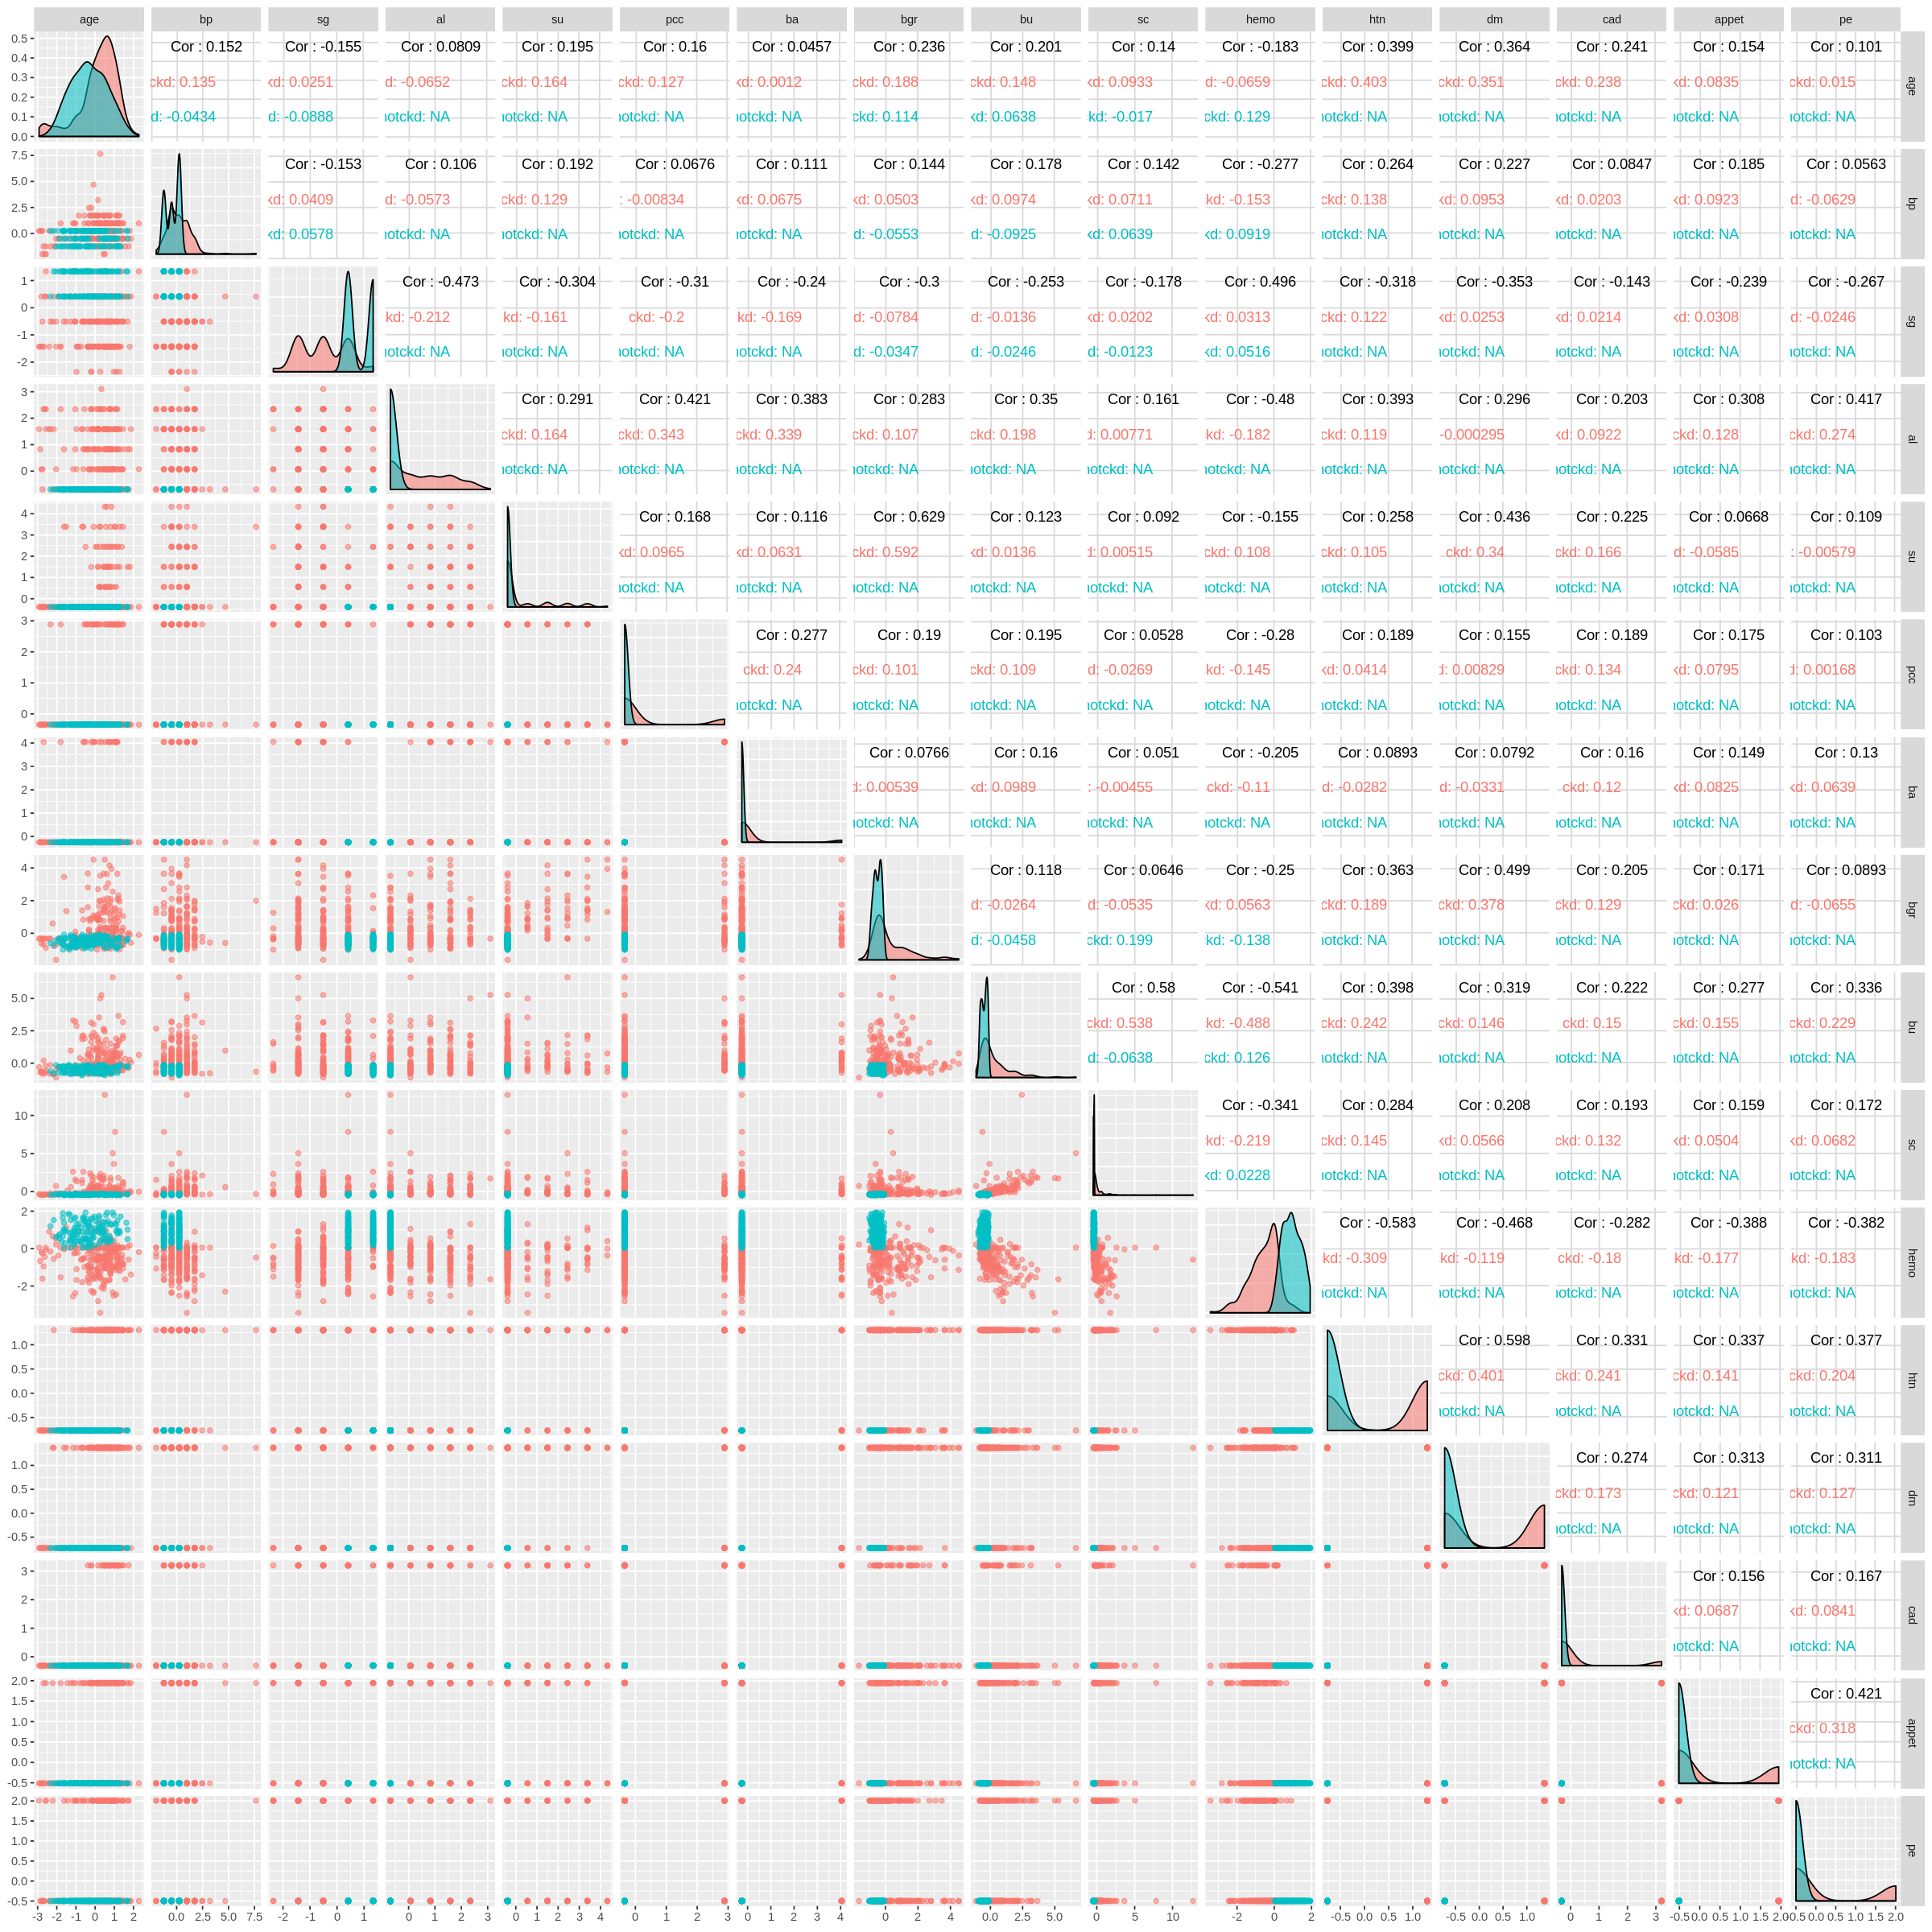

In [12]:
# looking at the correlation between variables and whether or not somebody somebody has CKD
options(warn=-1)
options(repr.plot.width = 20, repr.plot.height = 20) 
plot <- kidney_data %>%
    ggpairs(columns = 1:16, mapping = ggplot2::aes(colour = class, alpha = 0.5))
plot


**Figure 1 (above): a ggpairs plot to explore the correlation between variables and the class**

From this exploration we notice that hemo, pcv, and sc are all excellent variables to use, but we still want to consider all the other variables as well.

### Splitting Data

We want a huge training set, so we plan to use all the first 80% of the rows of the dataset to train the model and the latter 20% to test it. We also use set.seed to maintain replicability. 

In [13]:
set.seed(2000)

# using 80% of the data as training data

training_rows <- kidney_data %>% 
  select(class) %>% 
  unlist() %>%
  createDataPartition(p = 0.80, list = FALSE)

In [14]:
X_train <- kidney_data %>% 
  select(age, bp, sg, al, su, pcc, ba, bgr, bu, sc, hemo, htn, dm, cad, appet, pe, ane) %>% 
  slice(training_rows) %>% 
  data.frame()

Y_train <- kidney_data %>% 
  select(class) %>% 
  slice(training_rows) %>% 
  unlist()

X_test <- kidney_data %>% 
  select(age, bp, sg, al, su, pcc, ba, bgr, bu, sc, hemo, htn, dm, cad, appet, pe, ane) %>% 
  slice(-training_rows) %>% 
  data.frame()

Y_test <- kidney_data %>% 
  select(class) %>% 
  slice(-training_rows) %>% 
  unlist()

### Determining which k to use, and 10-fold cross validation

We want to perform 10-fold cross validation using trainControl to find out which value of k would be the best fit for our knn-classification model. 

In [15]:
install.packages("e1071")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [16]:
train_control <- trainControl(method = "cv", number = 10)
k_lots = data.frame(k = seq(from = 1, to = 204, by = 1)) 
knn_cv <- train(x = X_train, 
                       y = Y_train, 
                       method = "knn", 
                       tuneGrid = k_lots, 
                       trControl = train_control) 
knn_cv

k-Nearest Neighbors 

307 samples
 17 predictor
  2 classes: 'ckd', 'notckd' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 277, 277, 275, 277, 277, 276, ... 
Resampling results across tuning parameters:

  k    Accuracy   Kappa    
    1  0.9804234  0.9587787
    2  0.9804234  0.9587787
    3  0.9708468  0.9393602
    4  0.9677218  0.9328028
    5  0.9643884  0.9260202
    6  0.9643884  0.9260202
    7  0.9578293  0.9128419
    8  0.9611626  0.9198841
    9  0.9578293  0.9128419
   10  0.9478293  0.8922344
   11  0.9511626  0.8990170
   12  0.9479368  0.8925811
   13  0.9347110  0.8657231
   14  0.9248185  0.8461398
   15  0.9182594  0.8332973
   16  0.9185753  0.8341482
   17  0.9215927  0.8398344
   18  0.9186828  0.8349825
   19  0.9119086  0.8208285
   20  0.9085753  0.8142914
   21  0.9118011  0.8204144
   22  0.8891062  0.7776673
   23  0.8890054  0.7781186
   24  0.8987903  0.7961529
   25  0.8824462  0.7665449
   26  0.8791129  0.7607250
  

To see how different values of k affect the accuracy of our knn-classifier, we'll plot k values v.s. accuracy of classifier and try to zero in on which k we must use to have the most accurate model.

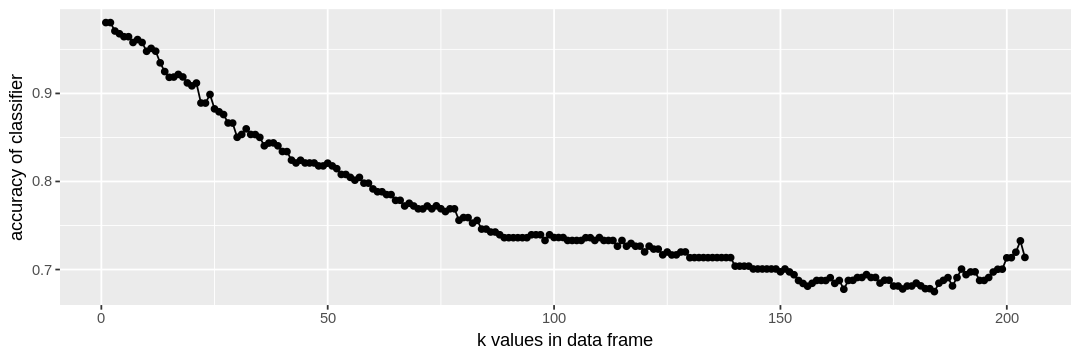

In [17]:
accuracies <- knn_cv$results
options(repr.plot.width = 9, repr.plot.height = 3) 
cross_val_plot<- accuracies %>%  
    ggplot(aes(x = k, y = Accuracy)) + 
    geom_point() +
    geom_line() +
    xlab("k values in data frame") +
    ylab("accuracy of classifier") 
cross_val_plot

**Figure 2 (above): a graph for accuracy of classifier vs k values in dataframe**

Looking at both, the cross-validation in knn_cv and the graph above, we can be certain that we have the most accurate classifier when k=2. So, let's use that to build our model.

### Finally, our model!

In [18]:
final_k = data.frame(k = 2)
classifier <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = final_k)
classifier

k-Nearest Neighbors 

307 samples
 17 predictor
  2 classes: 'ckd', 'notckd' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 307, 307, 307, 307, 307, 307, ... 
Resampling results:

  Accuracy   Kappa   
  0.9708898  0.938814

Tuning parameter 'k' was held constant at a value of 2

**Moment of truth.** Let's see how well the classifier works. Just so we can are one-hundred percent sure we're on the right track, we'll run the classifier on both the training data as well as the test data. What we really hope for is a very accurate prediction for the test values, as that assesses how good a job our classifier is doing. We will get these results via the confusionMatrix function.

In [19]:
# prediction results for training data
train_pred <- predict(classifier, X_train)
train_results <- confusionMatrix(train_pred, Y_train)
train_results

# prediction results for testing data
test_pred <- predict(classifier, X_test)
test_results <- confusionMatrix(test_pred, Y_test)
test_results

Confusion Matrix and Statistics

          Reference
Prediction ckd notckd
    ckd    191      0
    notckd   2    114
                                          
               Accuracy : 0.9935          
                 95% CI : (0.9767, 0.9992)
    No Information Rate : 0.6287          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9861          
 Mcnemar's Test P-Value : 0.4795          
                                          
            Sensitivity : 0.9896          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.9828          
             Prevalence : 0.6287          
         Detection Rate : 0.6221          
   Detection Prevalence : 0.6221          
      Balanced Accuracy : 0.9948          
                                          
       'Positive' Class : ckd             
                                          

Confusion Matrix and Statistics

          Reference
Prediction ckd notckd
    ckd     47      0
    notckd   1     28
                                          
               Accuracy : 0.9868          
                 95% CI : (0.9289, 0.9997)
    No Information Rate : 0.6316          
    P-Value [Acc > NIR] : 3.083e-14       
                                          
                  Kappa : 0.9719          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9792          
            Specificity : 1.0000          
         Pos Pred Value : 1.0000          
         Neg Pred Value : 0.9655          
             Prevalence : 0.6316          
         Detection Rate : 0.6184          
   Detection Prevalence : 0.6184          
      Balanced Accuracy : 0.9896          
                                          
       'Positive' Class : ckd             
                                          

## Discussion

### Results
We have found our classifier's accuracy for predictions based on training data to be 99.02%, and for predictions based on test data to be 98.68%. It happened so that our classifier predicted wrongly *once* that someone with CKD does not have CKD. This is dangerous since the stakes are very high, but we are very proud of our classifier for being able to predict really, really well in all other cases.  

#### Did we find what we were expecting to find?
We expected that "trained with the health records for patients with and without CKD, our model, we hope, will be able to accurately (over 92% of the time) predict whether or not a ‘new’ patient has CKD or not."
Well, our classifier has far surpassed our expectations! With an accuracy of over 98%!

#### Impact of our findings
Being able to successfully predict whether or not a patient has or will have CKD will enable doctors and patients both to proactively start treatment much sooner and prevent worsening health and even death. Our model helps in this process by reducing manual computational time and the number of experts required to successfully predict whether or not someone has CKD or not, and does so with very reasonable accuracy. We feel that the impact of this is huge.   

### We have cheered, but now we move onwards!
##### What future questions could this lead to?
People of colour, smokers, and obese people are more likely to suffer from CKD<sup>2</sup>. We haven’t considered these or any other factors outside of the data provided in the initial dataset. To have an even better model, we must make sure to consider more variables and find a way to aptly fit them into our pre-existing model.<br/>
Moreover, our model currently uses many predicting variables. Conducting all the tests that give us the training values for these variables are very time consuming and costly. Maybe working out which variables most affect whether or not someone has CKD would be a good way to combat this problem. It would also be a great idea because knn-classification works best with a small to medium amount of predicting variables.

### References
1. Bikbov B, Perico N, and Remuzzi G. (2016). Disparities in Chronic Kidney Disease Prevalence among Males and Females in 195 Countries: Analysis of the Global Burden of Disease 2016 Study. Nephron 2018;:313-318. doi: 10.1159/000489897
2. "Chronic Kidney Disease - Symptoms And Causes". Mayo Clinic, 2019, https://www.mayoclinic.org/diseases-conditions/chronic-kidney-disease/symptoms-causes/syc-20354521.

**Dataset courtesy of UCI Machine Learning Repository** <br/>
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: the University of California, School of Information and Computer Science.
